In [1]:
import numpy as np
import pandas as pd
import time as tm

from matplotlib import pyplot

In [2]:
# Figure 3.2: Data Size in Each Region - US

# choose the data by changing the variable, "data_loc", to get data size in different regionss
data_loc = 'us'
file = f'../Data/{data_loc}.csv'

df = pd.read_csv(file)
df = pd.DataFrame(df)

time_start = tm.time()

ip_time = dict()
special_chr = ["{", "}", "'", ":", " "]

for i in range(len(df)):
    raw_points = df['transactionList'][i]
    points = ''.join(e for e in raw_points if e not in special_chr)
    points = points.split(",")
    for j in range(len(points)):
        time = points[j][:17]
        ip = points[j][17:]
        if ip not in ip_time:
            ip_time[ip] = [time]
        else:
            ip_time[ip].append(time)

time_end = tm.time()
runtime = time_end - time_start
print(f'runtime: {runtime} second')

total_num = len(ip_time)
print(f'num of total server: {total_num}')

print(f'\nData Size of "{data_loc}": {len(df)}')

print('Figure 3.2: Data Size in Each Region')

C:\Users\smart\AppData\Local\Temp\ipykernel_20796\442452774.py:7: DtypeWarning: Columns (1,5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


runtime: 40.69341707229614 second
num of total server: 619

Data Size of "us": 284249
Figure 3.2: Data Size in Each Region


In [3]:
# select specific period from the dataset, "ip_time"

def get_ip_time(ip_data=ip_time, period='2021', period_ip_time=None): # period_ip_time: use to accumulate date
    if period_ip_time is None:
        period_ip_time = dict()
    if type(period) == str:
        len_p = len(period)
        for ip in ip_data:
            for time in ip_data[ip]:
                if time[0:len_p] == period:
                    if ip not in period_ip_time:
                        period_ip_time[ip] = [time]
                    else:
                        period_ip_time[ip] += [time]
    elif type(period) == list: #[time_1, time_2, ...]
        period_ip_time = get_ip_time(period=period[0])
        for time_i in period[1:]:
            period_ip_time = get_ip_time(period=time_i, period_ip_time=period_ip_time)
    return period_ip_time

# get 2021 data - US-All
# data_2021 = get_ip_time() # data_us_all
data_us_all = get_ip_time(period='2021') # data_us_all

# get 2020 & 2021 data
# data_all = get_ip_time(period='20')
data_2020_2021 = get_ip_time(period='20')

for key, value in data_2020_2021.items():
    print(key)
    print(value[0:5])
    break

52.223.228.27
['2020-11-26T170323', '2020-11-26T182647', '2020-11-26T183046', '2020-11-26T183509', '2020-11-26T183213']


In [4]:
# setup hour axis for below chart
hour_axis = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
             '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']

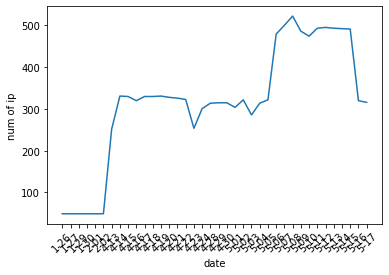

Figure 3.3: Number of servers in the US


In [5]:
# Figure 3.3: Number of servers in the US
# for Figure 3.4 ~ Figure 3.7, change the dataset by changing the variable, "data_loc".

data_choose = data_2020_2021

date_ip_count = dict()
for ip in data_choose:
    for time in data_choose[ip]:
        date = time[:10]
        if date not in date_ip_count:
            date_ip_count[date] = [ip]
        elif ip not in date_ip_count[date]:
            date_ip_count[date].append(ip)

date_axis = list()
count_axis = list()
for key, value in date_ip_count.items():
    date_axis.append(key[6:10])
    count_axis.append(len(value))

pyplot.xlabel('date')
pyplot.xticks(rotation=45)
pyplot.ylabel('num of ip')
pyplot.plot(date_axis, count_axis)
pyplot.show()

print('Figure 3.3: Number of servers in the US')

In [6]:
# Figure 3.8: Transaction Count in Subnets

data_choose = data_2020_2021

subnet_count = dict()
for ip in data_choose:
    if ip[0:10] not in subnet_count:
        subnet_count[ip[0:10]] = len(data_choose[ip])
    else:
        subnet_count[ip[0:10]] += len(data_choose[ip])
        
for subnet in subnet_count:
    print(f"'{subnet}': {subnet_count[subnet]}")
    
print('\nFigure 3.8: Transaction Count in Subnets')

'52.223.228': 1775263
'52.223.227': 1196750
'99.181.96.': 3709849
'52.223.226': 368422
'52.223.244': 303296
'99.181.97.': 278321
'192.16.65.': 1253922
'52.223.247': 5
'52.223.246': 10220
'52.223.225': 11936
'52.223.224': 11662
'52.223.243': 11925
'52.223.229': 4674
'99.181.65.': 2
'52.223.248': 1

Figure 3.8: Transaction Count in Subnets


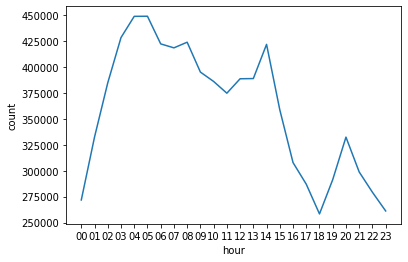

Figure 3.9: Hour-Count Distribution of All Servers in the US


In [7]:
# Figure 3.9: Hour-Count Distribution of All Servers in the US

data_choose = data_us_all

hour_transaction_count = dict()
for hour in hour_axis:
    hour_transaction_count[hour] = 0
    
for ip in data_choose:
    for time in data_choose[ip]:
        hour = time[11:13]
        hour_transaction_count[hour] += 1
            
trans_count_axis = list()
for hour in hour_axis:
    trans_count_axis.append(hour_transaction_count[hour])


pyplot.xlabel('hour')
pyplot.ylabel('count')
pyplot.plot(hour_axis, trans_count_axis)
pyplot.show()

print('Figure 3.9: Hour-Count Distribution of All Servers in the US')

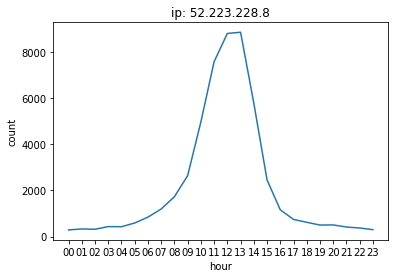

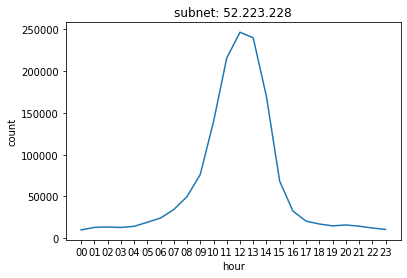

Figure 3.10: Hour-Count Distribution - 52.223.228.8 and 52.223.228


In [8]:
# Figure 3.10: Hour-Count Distribution - 52.223.228.8 and 52.223.228

data_choose = data_us_all

# ip: 52.223.228.8
hour_transaction_count = dict()
for hour in hour_axis:
    hour_transaction_count[hour] = 0
    
for time in data_choose['52.223.228.8']:
    hour = time[11:13]
    hour_transaction_count[hour] += 1
            
trans_count_axis = list()
for hour in hour_axis:
    trans_count_axis.append(hour_transaction_count[hour])

pyplot.title('ip: 52.223.228.8')
pyplot.xlabel('hour')
pyplot.ylabel('count')
pyplot.plot(hour_axis, trans_count_axis)
pyplot.show()

# subnet: 52.223.228
hour_transaction_count = dict()
for hour in hour_axis:
    hour_transaction_count[hour] = 0
    
for ip in data_choose:
    subnet = ip[:10]
    if subnet == '52.223.228':
        for time in data_choose[ip]:
            hour = time[11:13]
            hour_transaction_count[hour] += 1
            
trans_count_axis = list()
for hour in hour_axis:
    trans_count_axis.append(hour_transaction_count[hour])

pyplot.title('subnet: 52.223.228')
pyplot.xlabel('hour')
pyplot.ylabel('count')
pyplot.plot(hour_axis, trans_count_axis)
pyplot.show()

print('Figure 3.10: Hour-Count Distribution - 52.223.228.8 and 52.223.228')

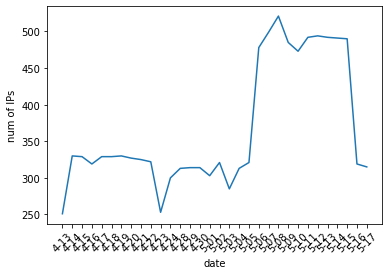

Figure 3.11: Number of IPs in the US


In [9]:
# Figure 3.11: Number of IPs in the US

data_choose = data_us_all # US-All

date_ip_count = dict()
for ip in data_choose:
    for time in data_choose[ip]:
        date = time[:10]
        if date not in date_ip_count:
            date_ip_count[date] = [ip]
        elif ip not in date_ip_count[date]:
            date_ip_count[date].append(ip)

date_axis = list()
count_axis = list()
for key, value in date_ip_count.items():
    date_axis.append(key[6:10])
    count_axis.append(len(value))

pyplot.xlabel('date')
pyplot.xticks(rotation=45)
pyplot.ylabel('num of IPs')
pyplot.plot(date_axis, count_axis)
pyplot.show()

print('Figure 3.11: Number of IPs in the US')

last_date: 04-13, date: 04-13
last_date: 04-24, date: 04-28
last_date: 04-30, date: 05-01


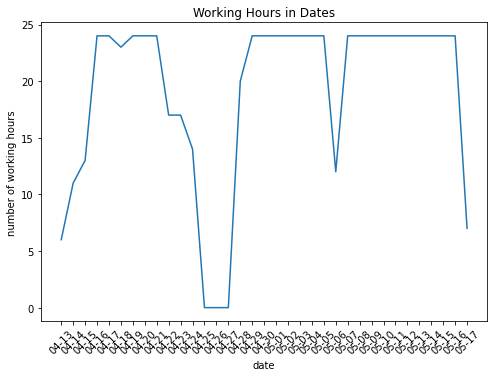

Figure 3.12: Number of Working Hours in US-All


In [10]:
# Figure 3.12: Number of Working Hours in US-All

data_choose = data_us_all

day_work_hours = dict()
for _ip in data_choose:
    for time in data_choose[_ip]:
        date = time[5:10]
        hour = time[11:13]
        if date not in day_work_hours:
            day_work_hours[date] = [hour]
        elif hour not in day_work_hours[date]:
            day_work_hours[date].append(hour)

# check the date
last_date = '04-13' # first date in US-All
for date in day_work_hours:
    if int(date[-2:]) - int(last_date[-2:]) != 1:
        print(f'last_date: {last_date}, date: {date}')
    last_date = date
    
# add the dates with 0 work hour
day_work_hours['04-25'] = []
day_work_hours['04-26'] = []
day_work_hours['04-27'] = []

x_dates = []
y_work_hours = []
for date, hours in sorted(day_work_hours.items()):
    x_dates.append(date)
    y_work_hours.append(len(hours))
    
pyplot.rcParams["figure.figsize"] = (8, 5.5)
pyplot.title('Working Hours in Dates')
pyplot.xlabel('date')
pyplot.ylabel('number of working hours')
pyplot.xticks(rotation=45)
pyplot.plot(x_dates, y_work_hours)
pyplot.show()

print('Figure 3.12: Number of Working Hours in US-All')

num of hour no data: 12


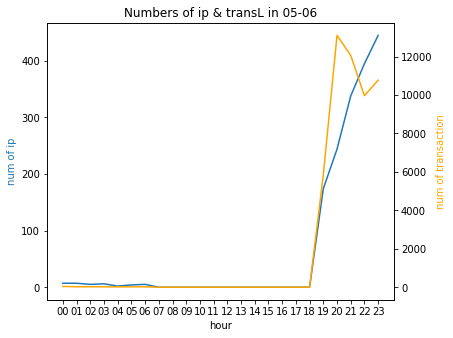

Figure 3.13: Number of IPs and Transaction Count on May 6


In [11]:
# Figure 3.13: Number of IPs and Transaction Count on May 6

date_choose = '05-06'

data = data_us_all
hour_ip_count = dict()
hour_transaction_count = dict()

for ip in data:
    for time in data[ip]:
        date = time[5:10]
        if date == date_choose:
            hour = time[11:13]
            if hour not in hour_ip_count:
                hour_ip_count[hour] = [ip]
                hour_transaction_count[hour] = 1
            elif ip not in hour_ip_count[hour]:
                hour_ip_count[hour].append(ip)
                hour_transaction_count[hour] += 1
            else: hour_transaction_count[hour] += 1
            
ip_count_axis = list()
trans_count_axis = list()
zero_count = 0
for key in hour_axis:
    if key not in hour_ip_count:
        ip_count_axis.append(0)
        trans_count_axis.append(0)
        zero_count += 1
    else:
        ip_count_axis.append(len(hour_ip_count[key]))
        trans_count_axis.append(hour_transaction_count[key])

print(f'num of hour no data: {zero_count}')

pyplot.rcParams["figure.figsize"] = [6.4, 4.8]

fig, ax1 = pyplot.subplots()
pyplot.title(f'Numbers of ip & transL in {date_choose}')
pyplot.xlabel('hour')
ax2 = ax1.twinx()

ax1.set_ylabel('num of ip', color='tab:blue')
ax1.plot(hour_axis, ip_count_axis, color='tab:blue')
ax1.tick_params(axis='y')

ax2.set_ylabel('num of transaction', color='orange')
ax2.plot(hour_axis, trans_count_axis, color='orange')
ax2.tick_params(axis='y')

fig.tight_layout()
pyplot.show()

print('Figure 3.13: Number of IPs and Transaction Count on May 6')

In [12]:
# Table 3.1: Data from 2021 May 6 to May 17

data = data_us_all
date_work_hour = dict()
date_transaction_count = dict()
date_hour_trans_count = dict()

for ip in data:
    for time in data[ip]:
        date = time[5:10]
        if date > '05-05' and date < '05-18':
            hour = time[11:13]
            if date not in date_work_hour:
                date_work_hour[date] = [hour]
                date_transaction_count[date] = 1
                date_hour_trans_count[date] = np.zeros((24,), dtype=int)
                date_hour_trans_count[date][int(hour)] = 1
            else:
                if hour not in date_work_hour[date]:
                    date_work_hour[date].append(hour)
                date_transaction_count[date] += 1
                date_hour_trans_count[date][int(hour)] += 1
                
# print the result in Table 3.1
for date in date_work_hour:
    print(f'date: {date}')
    print(f'working hour: {len(date_work_hour[date])}')
    print(f'transaction count: {date_transaction_count[date]}')
    print(f'mini hour count: {min(date_hour_trans_count[date])}\n') # different 2022.9.15
    
print('\nTable 3.1: Data from 2021 May 6 to May 17')

date: 05-06
working hour: 12
transaction count: 51894
mini hour count: 0

date: 05-07
working hour: 24
transaction count: 436552
mini hour count: 13101

date: 05-08
working hour: 24
transaction count: 511106
mini hour count: 13064

date: 05-09
working hour: 24
transaction count: 460176
mini hour count: 9374

date: 05-10
working hour: 24
transaction count: 362727
mini hour count: 10053

date: 05-11
working hour: 24
transaction count: 403603
mini hour count: 11393

date: 05-12
working hour: 24
transaction count: 438546
mini hour count: 7760

date: 05-13
working hour: 24
transaction count: 444512
mini hour count: 8894

date: 05-14
working hour: 24
transaction count: 473601
mini hour count: 13575

date: 05-15
working hour: 24
transaction count: 487068
mini hour count: 10961

date: 05-16
working hour: 24
transaction count: 255964
mini hour count: 5757

date: 05-17
working hour: 7
transaction count: 40057
mini hour count: 0


Table 3.1: Data from 2021 May 6 to May 17


last_date: 99-99, date: 04-13
last_date: 04-24, date: 04-28
last_date: 04-30, date: 05-01


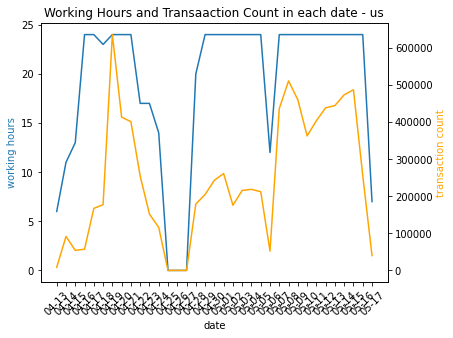

Figure 3.14 ~ 3.17: Transaction Count and Working Hours in the {loctions}


In [13]:
# Figure 3.14 ~ 3.17:Transaction Count and Working Hours in the {loctions}
# current data: US (to get the results in Figure 3.14 ~ 3.17, you need to change the dataset)

data = data_us_all
date_work_hour_count = dict()
date_transaction_count = dict()

for ip in data:
    for time in data[ip]:
        date = time[5:10]
        hour = time[11:13]
        if date not in date_work_hour_count:
            date_work_hour_count[date] = [hour]
            date_transaction_count[date] = 1
        elif hour not in date_work_hour_count[date]:
            date_work_hour_count[date].append(hour)
            date_transaction_count[date] += 1
        else: date_transaction_count[date] += 1

# set last_date to check the missing dates
last_date = '99-99'
for date in date_work_hour_count:
    if int(date[-2:]) - int(last_date[-2:]) != 1:
        print(f'last_date: {last_date}, date: {date}')
    last_date = date

# add missing dates (need manual add missing dates for other data)
if data_loc == 'us':
    missing_dates = ['04-25', '04-26', '04-27'] # US
else:
    missing_dates = [] # manual add missing date
for date in missing_dates:
    date_work_hour_count[date] = []
    date_transaction_count[date] = 0

date_axis = list()
work_hour_count_axis = list()
trans_count_axis = list()
for date in sorted(date_work_hour_count):
    date_axis.append(date)
    work_hour_count_axis.append(len(date_work_hour_count[date]))
    trans_count_axis.append(date_transaction_count[date])

fig, ax1 = pyplot.subplots()
pyplot.title(f'Working Hours and Transaaction Count in each date - {data_loc}')
pyplot.xlabel('date')
pyplot.xticks(rotation=45)
ax2 = ax1.twinx()

ax1.set_ylabel('working hours', color='tab:blue')
ax1.plot(date_axis, work_hour_count_axis, color='tab:blue')
ax1.tick_params(axis='y')

ax2.set_ylabel('transaction count', color='orange')
ax2.plot(date_axis, trans_count_axis, color='orange')
ax2.tick_params(axis='y')

fig.tight_layout()
pyplot.show()

print('Figure 3.14 ~ 3.17: Transaction Count and Working Hours in the {loctions}')